In [1]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
insurance_data= pd.read_csv("insurance.csv")

X=insurance_data.drop(columns=["charges"])
y=insurance_data["charges"]

X=pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int) #drop_first=False:-Remove one category column on purpose to avoid confusion in the model.

X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)



In [6]:
# create model
lasso_model=Lasso(alpha=0.5)

# train model
lasso_model.fit(X_train,y_train)

# prediction
y_pred=lasso_model.predict(X_test)

# calculate MSE
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

MSE: 33601197.56637193


MSE for alpha 0.001: 33596924.38828374
MSE for alpha 0.1: 33597770.05720262
MSE for alpha 1: 33605507.57554603
MSE for alpha 2: 33614211.30874086
MSE for alpha 3: 33623037.56043786
MSE for alpha 5: 33639750.85985903
MSE for alpha 10: 33679511.30099594
MSE for alpha 40: 33947018.40367208
MSE for alpha 50: 34042719.501167394
MSE for alpha 100: 34245283.94567648


<Axes: >

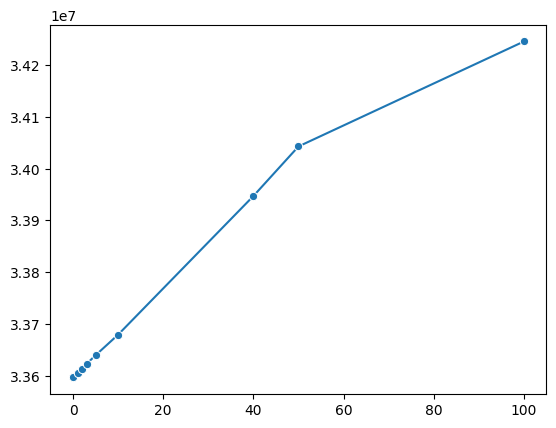

In [19]:
import seaborn as sns
alphas = [0.001, 0.1, 1, 2, 3, 5, 10, 40, 50, 100]
mses = []

for a in alphas:
    # create model
    lasso_model = Lasso(alpha=a)

    # train model
    lasso_model.fit(X_train, y_train)

    # prediction
    y_pred = lasso_model.predict(X_test)

    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)# visuliztaion

    print(f"MSE for alpha {a}: {mse}")
sns.lineplot(x=alphas,y=mses,marker="o")  

In [ ]:
#cross model for best alpha 

In [27]:
# Import LassoCV for automatic alpha selection
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# List of alpha values to test
a = [0.001, 0.1, 1, 2, 3, 5, 10, 40, 50, 100]

# Create LassoCV model
lasso_cv_model = LassoCV(
    alphas=a,          # candidate alpha values
    cv=5,              # 5-fold cross validation
    max_iter=1000,     # max training iterations
    random_state=42    # reproducibility
)

# Train model on training data
lasso_cv_model.fit(X_train, y_train)

# Print best alpha selected by CV
print("best alpha:", lasso_cv_model.alpha_)

# Predict on test data
y_pred = lasso_cv_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print model error
print("mse =", mse)


best alpha: 100.0
mse = 34245283.94567648
